In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
os.chdir("C:\\Users\\Sevak\\Desktop\\Analysis-of-Real-Estate-Markets-of-Armenia-main\\data")
os.listdir()

['cleaned_data.csv', 'encoded_data.csv', 'raw_data.csv']

In [4]:
data = pd.read_csv('encoded_data.csv')
data.head(10)

,District,Building Type,Rooms,Area,Floor,Renovation,Price
0,10,8,3,50,1,2,64000.0
1,2,5,2,70,3,1,150000.0
2,6,6,3,100,7,5,115000.0
3,6,6,1,45,1,2,67000.0
4,11,3,2,52,4,4,68000.0
5,6,6,1,45,2,4,62000.0
6,5,6,3,80,9,4,168000.0
7,5,8,1,31,4,5,80000.0
8,5,8,3,77,4,4,163000.0
9,0,8,2,48,4,5,66000.0


In [5]:
features = ["Area", "Rooms", "Renovation", "Floor", "Building Type", "District"]
X = data[features]
y = data["Price"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

In [7]:
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(
    X_train,
    y_train,
)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
relative_mae = mae / y_test.mean()
print(f"Relative MAE: {relative_mae:.2%}")

Mean Absolute Error: 16678.41
R^2 Score: 0.76
Relative MAE: 13.83%


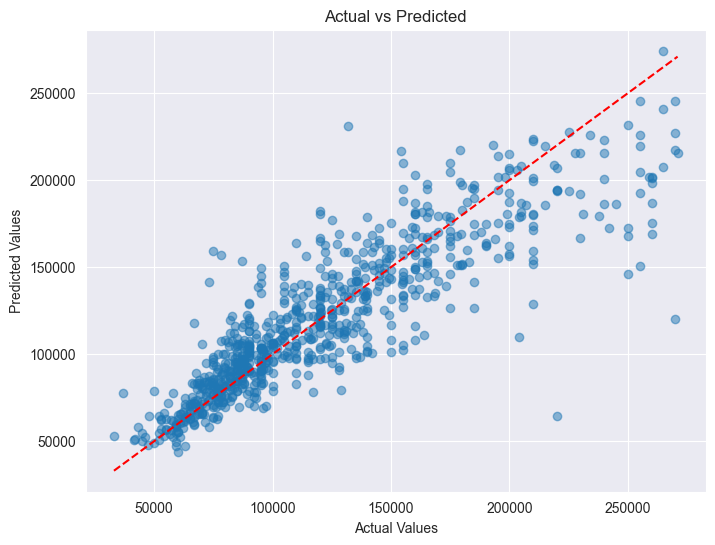

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

The plot shows a strong positive correlation between the model's predictions and the true values, indicating good predictive performance. Most points cluster closely around the diagonal line, suggesting the model generally makes accurate predictions.

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Կիրառել cross_val_predict՝ կանխատեսումներ ստանալու համար
y_pred = cross_val_predict(model, X, y, cv=kf)

# Հաշվել գնահատման չափանիշները
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 16894.97
Mean Squared Error (MSE): 597503466.93
Root Mean Squared Error (RMSE): 24443.88
R-squared (R²): 0.77


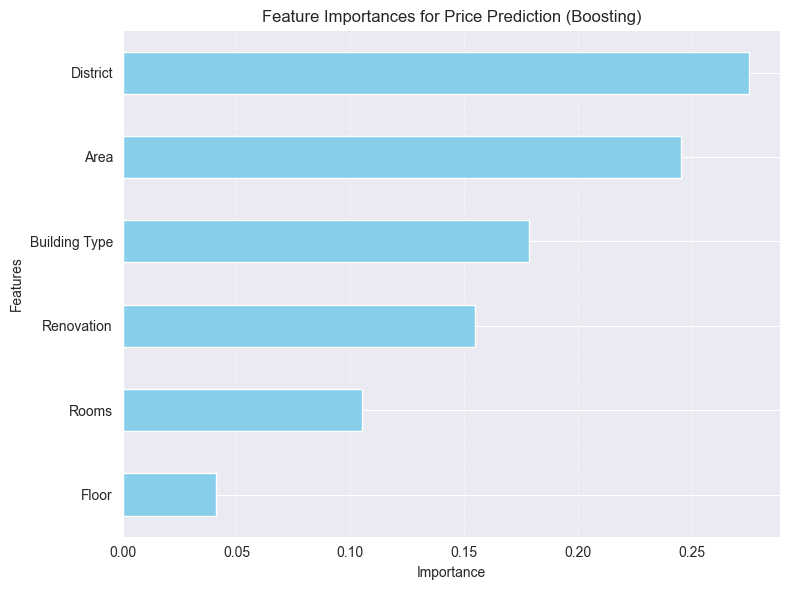

In [11]:
feature_names = ["Area", "Rooms", "Renovation", "Floor", "Building Type", "District"]
importances = model.feature_importances_

# Convert to a Pandas Series for easy plotting
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8, 6))
feat_importances.plot(kind="barh", color="skyblue")
plt.title("Feature Importances for Price Prediction (Boosting)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Conclusion:

The boosting model for price prediction heavily relies on `District` and `Area` as the primary determinants of price. `Building Type` and `Renovation` are also important factors. In contrast, the number of `Rooms` and `Floor` level have a considerably smaller influence. This analysis provides valuable insights for understanding which property characteristics are most crucial for price estimation, and can guide future data collection or model refinement efforts by focusing on the most impactful features.

---

## Model Evaluation and Results

### Evaluation Metrics

The model’s performance was assessed using the following standard regression metrics:

* **Mean Absolute Error (MAE):**

$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

which measures the average magnitude of errors between predicted values $\hat{y}_i$ and true values $y_i$, without considering their direction.

* **Mean Squared Error (MSE):**

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

which quantifies the average squared difference between predicted and actual values, penalizing larger errors more heavily.

* **Root Mean Squared Error (RMSE):**

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}
$$

providing an error metric in the same units as the target variable.

* **Coefficient of Determination ($R^2$ score):**

$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$

where $\bar{y}$ is the mean of the observed data. The $R^2$ score indicates the proportion of variance in the dependent variable that is predictable from the independent variables, with values closer to 1 representing better fit.

* **Relative Mean Absolute Error (Relative MAE):**

$$
\text{Relative MAE} = \frac{\text{MAE}}{\bar{y}} \times 100\%
$$

which normalizes the MAE relative to the average value of the target, expressing the error as a percentage.

---

### Experimental Setup

The model was evaluated using:

* A **hold-out test set**, where predictions on unseen data were compared to actual values.
* **K-fold cross-validation (with $k$ folds)** to estimate the model’s generalization performance by partitioning the dataset into $k$ subsets, sequentially training on $k-1$ folds and validating on the remaining fold.

---

### Results

* On the **hold-out test set**, the evaluation metrics were:

  * Mean Absolute Error (MAE): **16,678.41**
  * $R^2$ Score: **0.76**
  * Relative MAE: **13.83%**

* From **k-fold cross-validation**, the average results across folds were:

  * Mean Absolute Error (MAE): **16,894.97**
  * Mean Squared Error (MSE): **597,503,466.93**
  * Root Mean Squared Error (RMSE): **24,443.88**
  * $R^2$ Score: **0.77**

---

These results indicate consistent predictive accuracy and generalization performance between the hold-out test evaluation and cross-validation estimates.


---

## Final Summary

At the end of the project, the model was able to predict prices with good accuracy. On average, its predictions were off by about **16,700 $**, which means it makes reasonably close estimates. The model explains about **76–77%** of the variation in actual prices, showing it understands most of the patterns in the data.

The error size compared to the average price is about **14%**, which means the predictions are fairly reliable for practical use.

Overall, the results show the model performs consistently well both on unseen data and when tested multiple times, proving it is a solid tool for predicting prices.

---